In [66]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [3]:
folder = '/content/drive/MyDrive/Colab Notebooks/hinhMonAn/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('bun dau'):
    output= 1.0
  if file.startswith('bun bo'):
    output= 2.0
  if file.startswith('banh chung'):
    output= 3.0
  if file.startswith('cha ram'):
    output= 4.0
  if file.startswith('pho'):
    output= 5.0
  photo = load_img(folder + file, target_size= (30,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [4]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/nhan_dang_mon_an1.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/nhan_dang_mon_an2.npy', labels)

(2250, 30, 40, 3) (2250,)


In [5]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [6]:
print(test_x.shape, train_x.shape)

(112, 30, 40, 3) (2138, 30, 40, 3)


In [7]:
train_x = train_x.reshape((2138, 30, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((112, 30, 40, 3))
test_x = test_x.astype('float32')/255

In [8]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,6)
test_y = to_categorical(test_y,6)

In [43]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 51
epochs = 10
classes = 6

In [44]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (30, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))



In [45]:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(256, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 conv2d_36 (Conv2D)          (None, 15, 20, 64)        36928     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                      

In [46]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/10
42/42 [==============================] - 13s 276ms/step - loss: 1.2269 - accuracy: 0.4790
Epoch 2/10
42/42 [==============================] - 12s 275ms/step - loss: 0.7249 - accuracy: 0.7283
Epoch 3/10
42/42 [==============================] - 11s 274ms/step - loss: 0.5601 - accuracy: 0.7956
Epoch 4/10
42/42 [==============================] - 12s 279ms/step - loss: 0.4216 - accuracy: 0.8573
Epoch 5/10
42/42 [==============================] - 12s 278ms/step - loss: 0.2960 - accuracy: 0.8990
Epoch 6/10
42/42 [==============================] - 11s 262ms/step - loss: 0.1989 - accuracy: 0.9317
Epoch 7/10
42/42 [==============================] - 11s 254ms/step - loss: 0.1097 - accuracy: 0.9640
Epoch 8/10
42/42 [==============================] - 12s 280ms/step - loss: 0.0573 - accuracy: 0.9827
Epoch 9/10
42/42 [==============================] - 12s 277ms/step - loss: 0.0383 - accuracy: 0.9902
Epoch 10/10
42/42 [==============================] - 12s 281ms/step - loss: 0.0607 - accura

In [47]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

4/4 [==============================] - 1s 61ms/step - loss: 1.5888 - accuracy: 0.8214
Test accuracy: 0.8214285969734192


1/1 [==============================] - 0s 30ms/step
banh chung


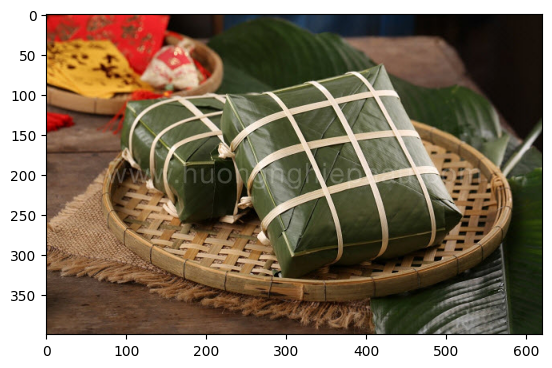

1/1 [==============================] - 0s 27ms/step
bun dau


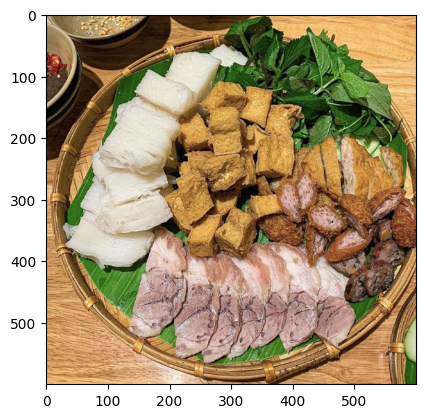

1/1 [==============================] - 0s 32ms/step
cha ram


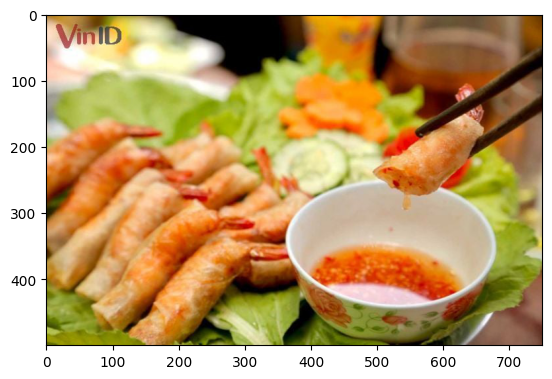

1/1 [==============================] - 0s 33ms/step
pho


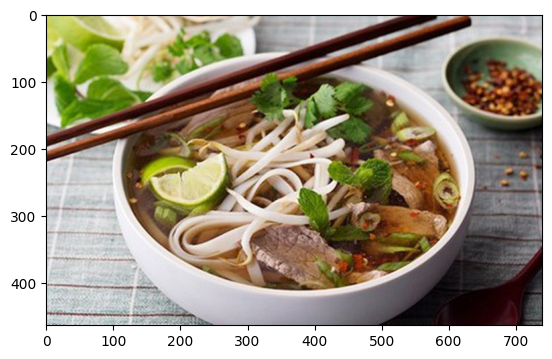

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Colab Notebooks/MonAnTest/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','bun dau', 'bun bo', 'banh chung', 'cha ram', 'pho']
  print(class_name[result])
  plt.show()